<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [1]:
import io
import requests
import ssl
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/creditcard.csv"
dataset=pd.read_csv(url)
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [74]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import statistics
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import preprocessing

from pylab import rcParams
rcParams['figure.figsize'] = 20,7
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)
pd.options.display.float_format = '{:,.2f}'.format

**1. Загрузить датасет**

In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

No nulls

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
dataset.isnull().sum().sort_values(ascending = False)

Class    0
V14      0
V1       0
V2       0
V3       0
        ..
V25      0
V26      0
V27      0
V28      0
Time     0
Length: 31, dtype: int64

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

0    284315
1       492
Name: Class, dtype: int64


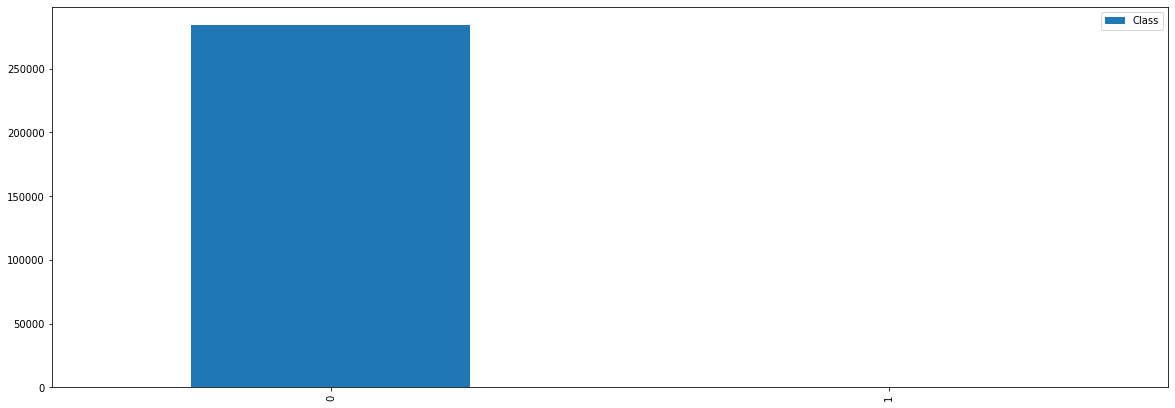

In [40]:
print(dataset['Class'].value_counts())
pd.DataFrame(dataset['Class'].value_counts()).plot(kind='bar')

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

Class
0   25,102,462.04
1       60,127.97
Name: Amount, dtype: float64


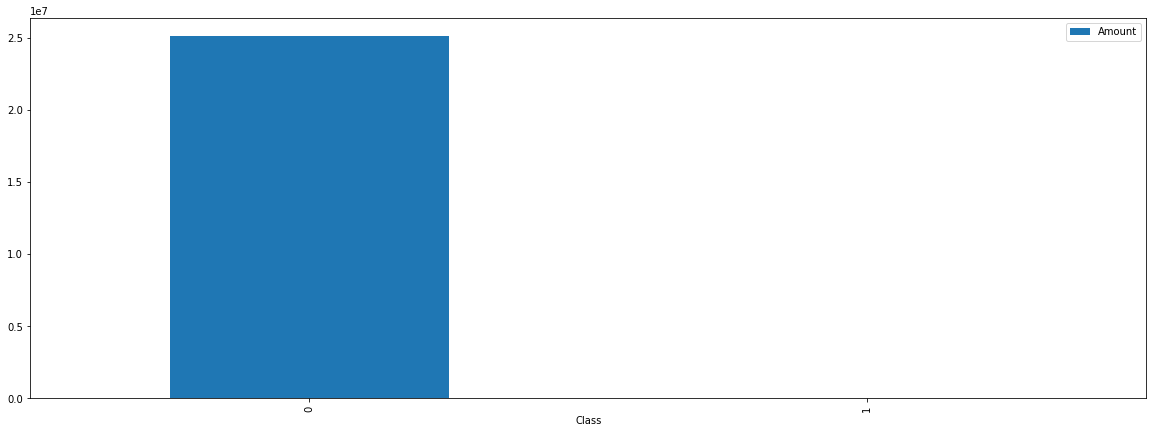

In [42]:
print(dataset.groupby('Class')['Amount'].sum())
pd.DataFrame(dataset.groupby('Class')['Amount'].sum()).plot(kind='bar')

Text(0.5, 1.0, 'Сумма по обманным операциям')

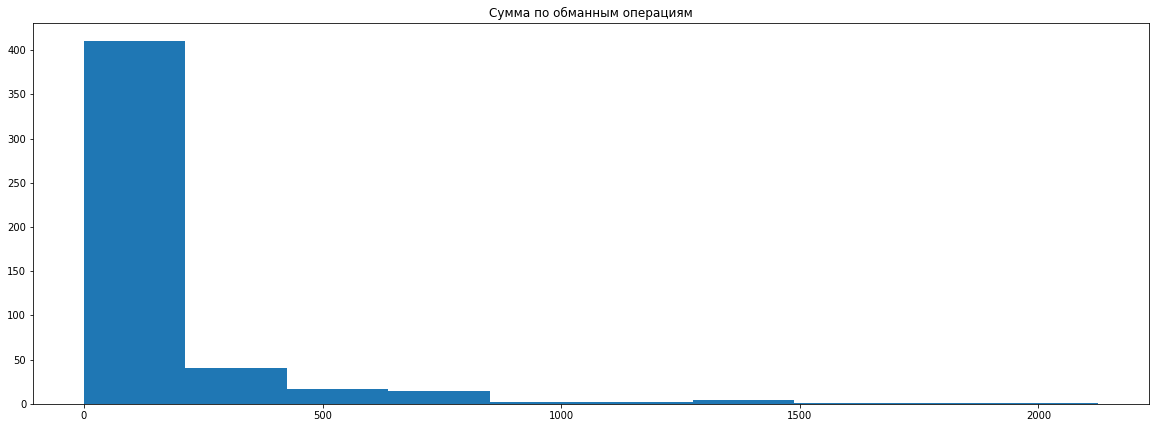

In [48]:
plt.hist(dataset.Amount[dataset.Class==1])
plt.title('Сумма по обманным операциям')

Text(0.5, 1.0, 'Сумма по честным операциям')

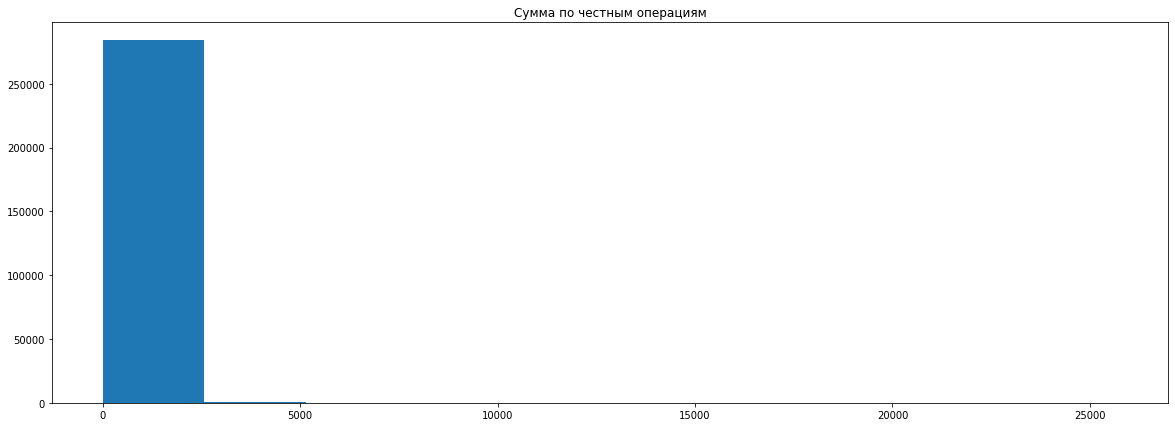

In [50]:
plt.hist(dataset.Amount[dataset.Class==0])
plt.title('Сумма по честным операциям')

**5. Построить графики histograms для всех значений**

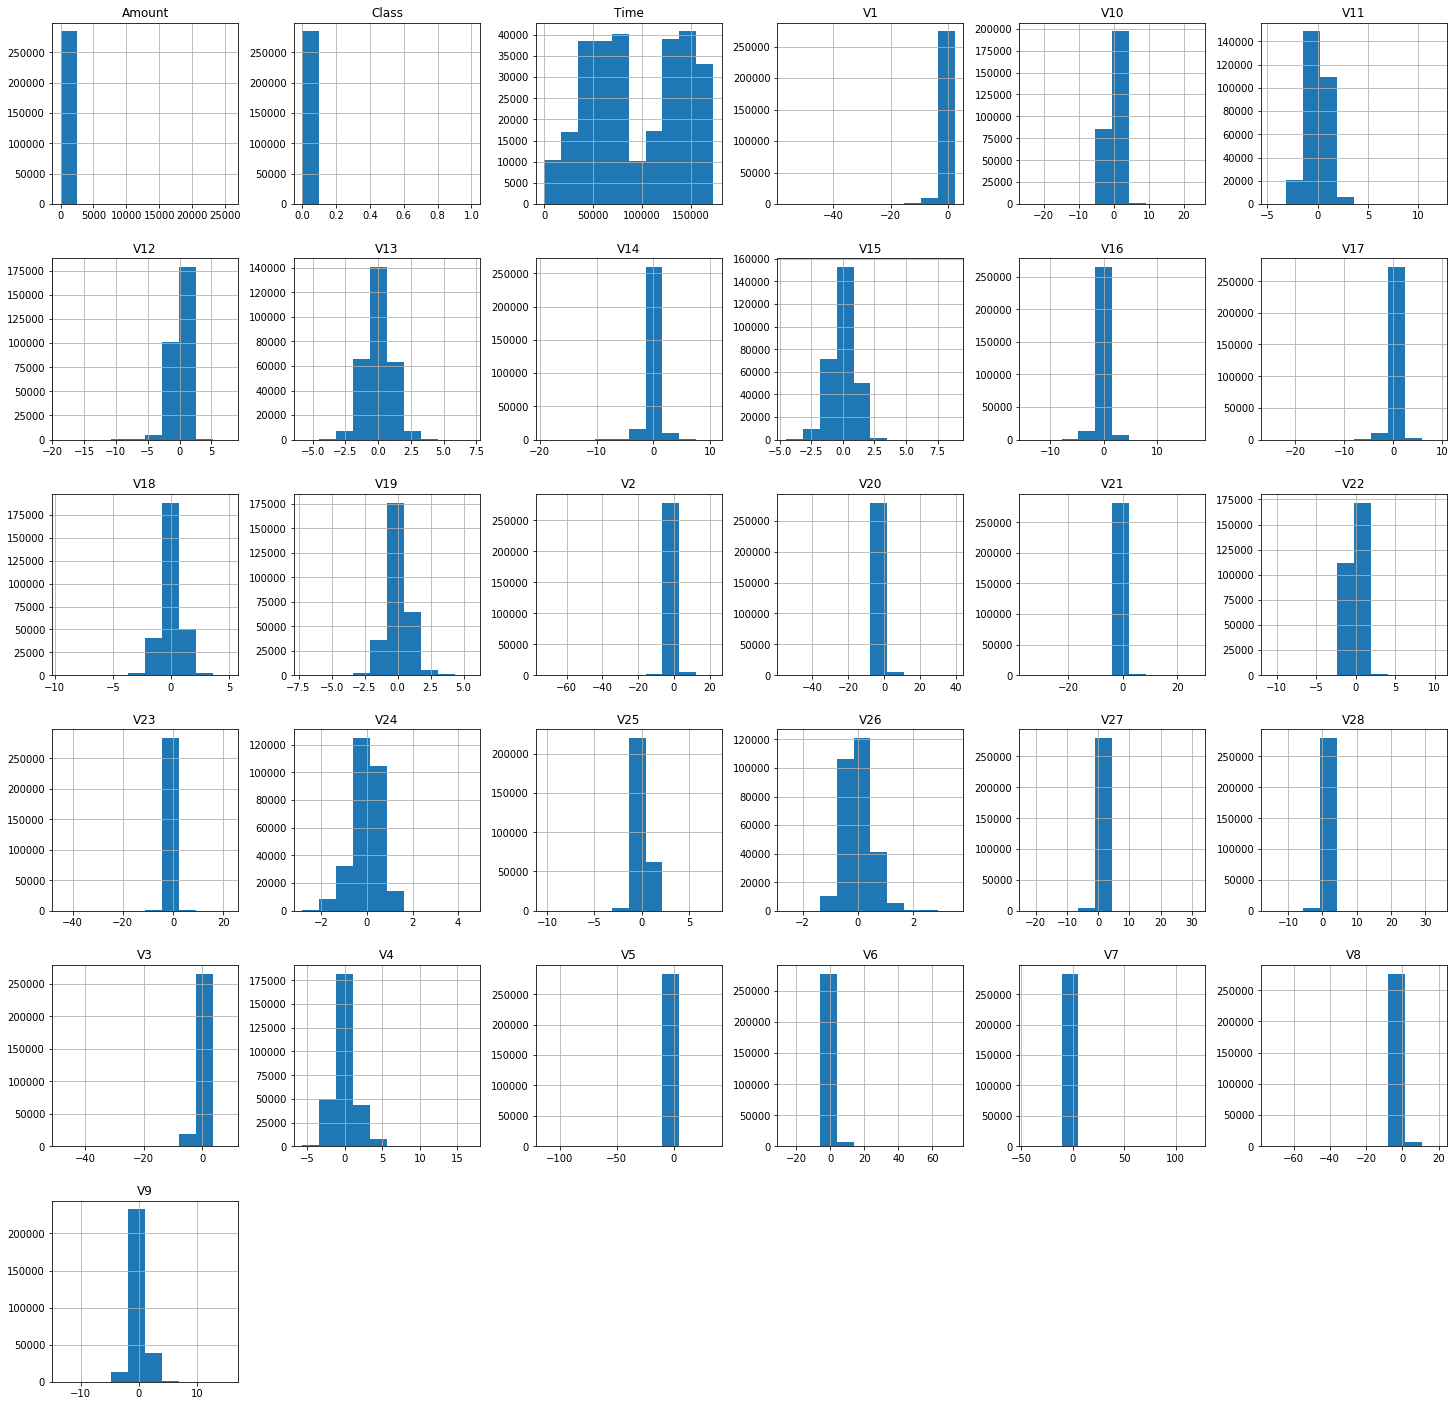

In [53]:
dataset.hist(figsize=(25,25))
plt.show()

**6. Построить матрицу корреляций для всех значений**

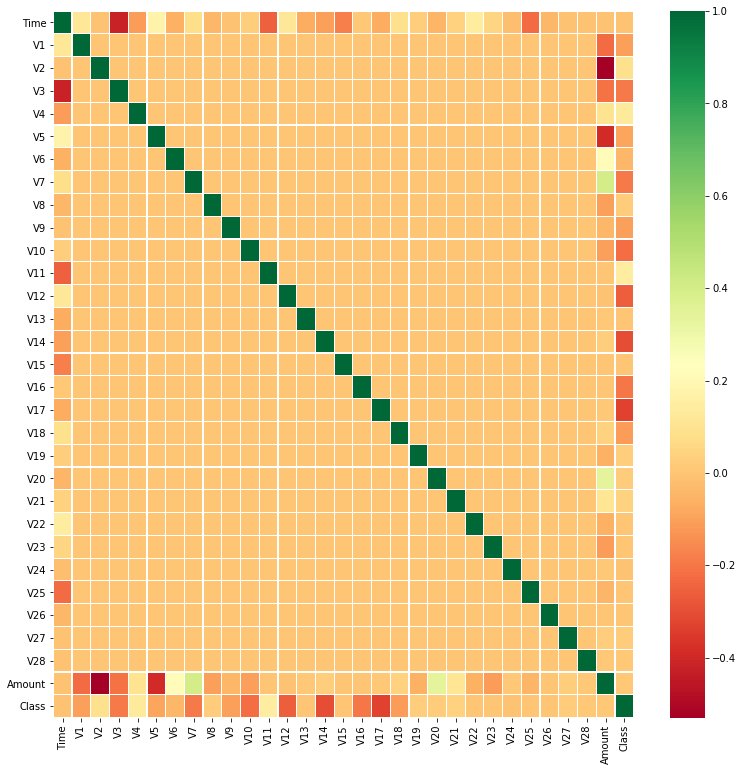

In [54]:
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(dataset.corr(), decimals=2)
sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2)

**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать модель деревья решений. Сделать classification report.**

In [59]:
data = dataset.iloc[:,:30]
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99


In [63]:
output_y = dataset.Class
input_x = data

In [64]:
from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22,\
    y_test_22 = train_test_split(input_x, output_y, test_size=0.2)

Модель Random Forest

In [65]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
# при желании можно изучить и поперебирать другие гиперпараметры 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
model.score(X_test_22, y_test_22)

0.9995259997893332

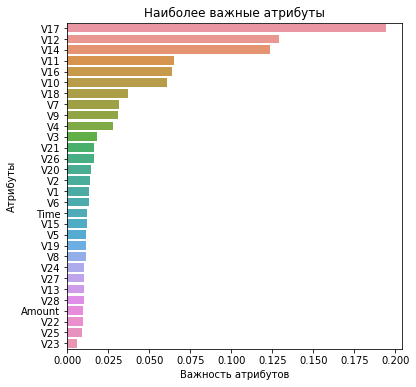

In [67]:
headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

Как делать classification report:

In [72]:
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.98      0.71      0.82        89

    accuracy                           1.00     56962
   macro avg       0.99      0.85      0.91     56962
weighted avg       1.00      1.00      1.00     56962



0.9995259997893332

**8. Нормализовать данные и написать модель Random Forest уже на нормализованных данных. Сделать classification report. Сравнить с результатом, полученном в задаче 7. Нужно ли нормализовывать данные?**

### Answer
После нормирования данных качество модели очень мало изменилось (но оно изначально было очень высоким), но распределение "весов" атрибутов в деревьях немного поменялось. 
Скорее всего, в данных изначально большая часть атрибутов (V1-V28) несильно удалялись друг от друга, но нормирование, в любом случае, было полезно провести.

In [75]:
headers = list(data.columns.values)

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-1.00,0.87,0.53,0.76,-0.37,0.53,-0.46,-0.47,0.57,-0.05,0.02,-0.50,0.36,-0.26,0.27,-0.11,-0.13,0.47,0.31,0.19,0.17,0.12,0.05,0.33,-0.22,0.17,-0.21,-0.16,-0.37,-0.99
1,-1.00,0.96,0.54,0.68,-0.46,0.53,-0.48,-0.47,0.57,-0.09,0.01,-0.24,0.49,-0.03,0.28,-0.23,-0.07,0.46,0.28,0.10,0.16,0.12,-0.04,0.33,-0.33,0.17,-0.11,-0.17,-0.37,-1.00
2,-1.00,0.87,0.51,0.74,-0.46,0.52,-0.44,-0.46,0.58,-0.18,0.03,-0.36,0.41,0.01,0.28,0.02,-0.29,0.53,0.29,-0.23,0.17,0.13,0.09,0.36,-0.42,0.12,-0.19,-0.17,-0.38,-0.97
3,-1.00,0.88,0.53,0.74,-0.57,0.53,-0.45,-0.47,0.58,-0.17,0.02,-0.46,0.42,-0.02,0.27,-0.42,-0.17,0.42,0.58,-0.07,0.16,0.12,0.02,0.33,-0.55,0.23,-0.22,-0.16,-0.37,-0.99
4,-1.00,0.88,0.55,0.73,-0.46,0.53,-0.47,-0.46,0.56,-0.02,0.05,-0.53,0.45,0.11,0.22,-0.30,-0.13,0.45,0.30,0.25,0.17,0.12,0.09,0.33,-0.20,0.13,0.01,-0.16,-0.37,-0.99


In [76]:
df_norm.columns = headers
df_norm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.00,0.87,0.53,0.76,-0.37,0.53,-0.46,-0.47,0.57,-0.05,0.02,-0.50,0.36,-0.26,0.27,-0.11,-0.13,0.47,0.31,0.19,0.17,0.12,0.05,0.33,-0.22,0.17,-0.21,-0.16,-0.37,-0.99
1,-1.00,0.96,0.54,0.68,-0.46,0.53,-0.48,-0.47,0.57,-0.09,0.01,-0.24,0.49,-0.03,0.28,-0.23,-0.07,0.46,0.28,0.10,0.16,0.12,-0.04,0.33,-0.33,0.17,-0.11,-0.17,-0.37,-1.00
2,-1.00,0.87,0.51,0.74,-0.46,0.52,-0.44,-0.46,0.58,-0.18,0.03,-0.36,0.41,0.01,0.28,0.02,-0.29,0.53,0.29,-0.23,0.17,0.13,0.09,0.36,-0.42,0.12,-0.19,-0.17,-0.38,-0.97
3,-1.00,0.88,0.53,0.74,-0.57,0.53,-0.45,-0.47,0.58,-0.17,0.02,-0.46,0.42,-0.02,0.27,-0.42,-0.17,0.42,0.58,-0.07,0.16,0.12,0.02,0.33,-0.55,0.23,-0.22,-0.16,-0.37,-0.99
4,-1.00,0.88,0.55,0.73,-0.46,0.53,-0.47,-0.46,0.56,-0.02,0.05,-0.53,0.45,0.11,0.22,-0.30,-0.13,0.45,0.30,0.25,0.17,0.12,0.09,0.33,-0.20,0.13,0.01,-0.16,-0.37,-0.99


In [84]:
X_train_22, X_test_22, y_train_22,\
    y_test_22 = train_test_split(df_norm, output_y, test_size=0.2)

In [85]:
model=RandomForestClassifier(n_estimators=100)
# обучаем модель
model.fit(X_train_22,y_train_22)
model.score(X_test_22, y_test_22)

0.9995435553526912

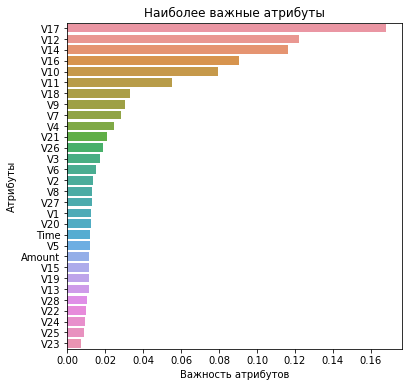

In [86]:
headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

In [87]:
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.95      0.78      0.86       101

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



0.9995435553526912

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные).**

In [88]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)

ros.fit(X_train_22, y_train_22)
X_resampled, y_resampled = ros.fit_sample(X_train_22, y_train_22)
print('Количество элементов до операции:', len(X_train_22))
print('Количество элементов после операции:', len(X_resampled))

Количество элементов до операции: 227845
Количество элементов после операции: 454908


In [89]:
unique, counts = np.unique(y_resampled, return_counts=True)
dict(zip(unique, counts))

{0: 227454, 1: 227454}

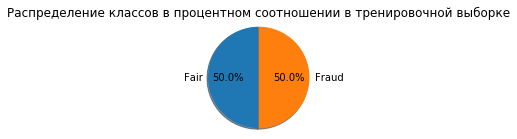

In [92]:
# Построем pie-график
labels = 'Fair', 'Fraud'
sizes = [227454, 227454]
explode = (0, 0.0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots(figsize=(2, 2))
plt.title('Распределение классов в процентном соотношении в тренировочной выборке')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()